In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [143]:
df=pd.read_excel('loan.xlsx')     # loading data

In [109]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


In [111]:
df.isnull().sum()  # checking for null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

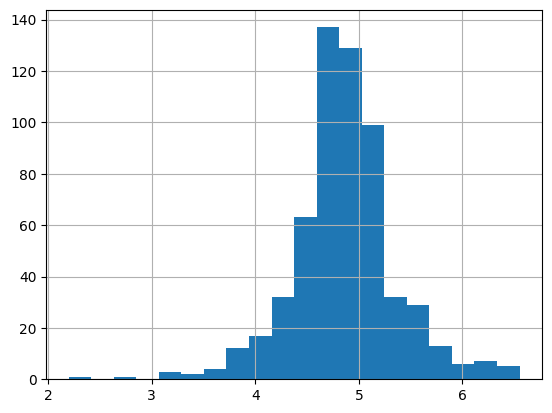

In [112]:
df['LoanAmount_log']=np.log(df['LoanAmount'])  # adding log values columb
df['LoanAmount_log'].hist(bins=20)

<Axes: >

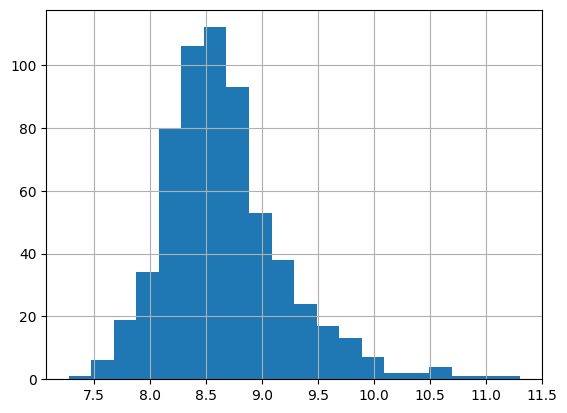

In [113]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [114]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)                       #filling up null values
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df.LoanAmount=df.LoanAmount_log.fillna(df.LoanAmount.mean())
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)




In [115]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [116]:
y=df.iloc[:,12].values     #slicing data frame for testing and predcition 
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [117]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
x

array([['Male', 'No', 0.0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [118]:
per_of_missing_gender=df['Gender'].isnull().sum()/df.shape[0]*100
print("%2f%%" %per_of_missing_gender)

0.000000%


Loan grouping by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

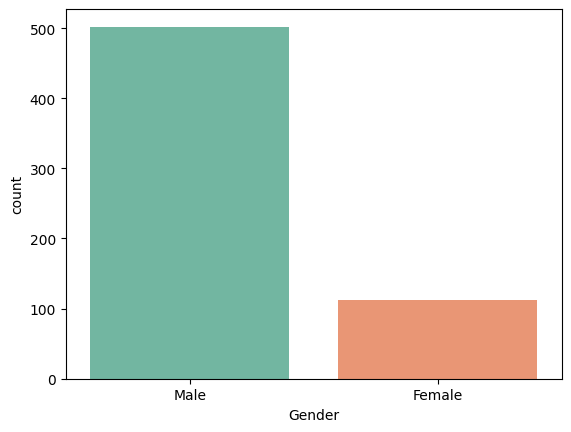

In [119]:
print("Loan grouping by gender")    # various grouping to show visualization 
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette='Set2')

Loan grouping by maritial status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

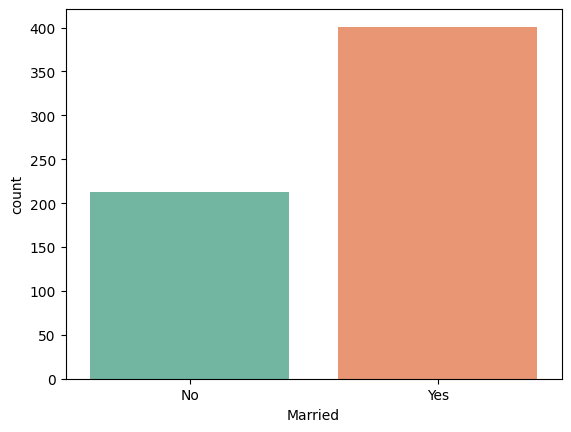

In [120]:
print("Loan grouping by maritial status")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette='Set2')

Loan grouping by dependets
Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

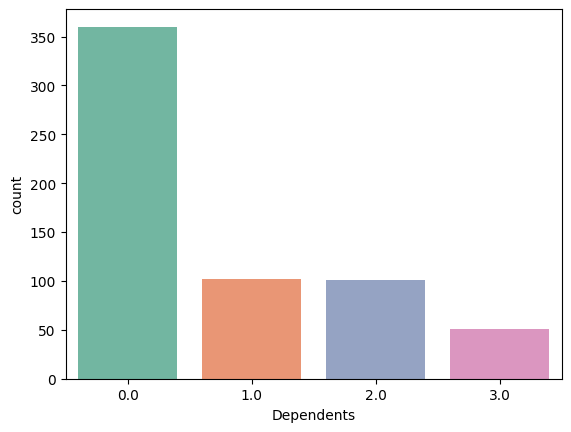

In [121]:
print("Loan grouping by dependets")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='Set2')

Loan grouping by emplyment status
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

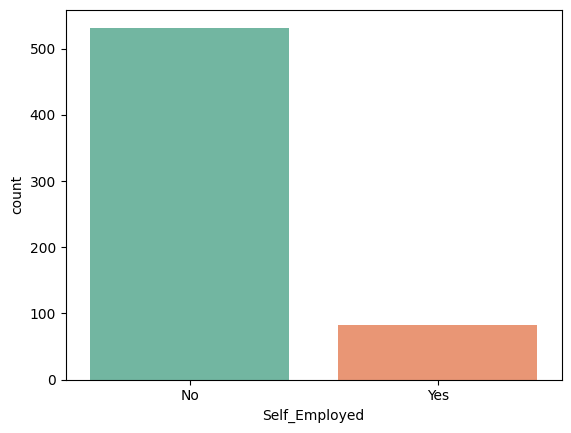

In [122]:
print("Loan grouping by emplyment status")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette='Set2')

Loan grouping by loan amount
LoanAmount
146.412162    22
4.787492      20
4.700480      17
4.605170      15
5.075174      12
              ..
5.480639       1
5.365976       1
4.077537       1
5.111988       1
5.533389       1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

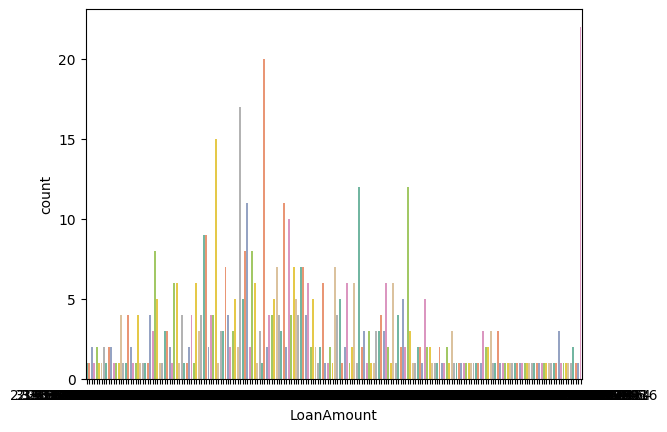

In [123]:
print("Loan grouping by loan amount")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df,palette='Set2')

Loan grouping by credit history
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

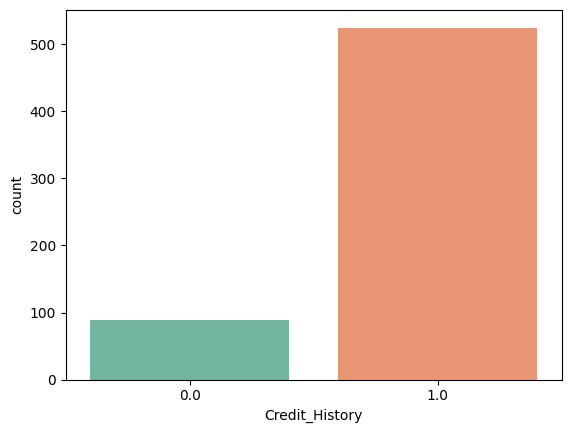

In [124]:
print("Loan grouping by credit history")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df,palette='Set2')

In [125]:
from sklearn.model_selection import train_test_split                 # Split the dataset into training and test sets


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import LabelEncoder



In [126]:
Labelencoder_x=LabelEncoder()                         # encoding and giving labels to data

X_train[:,0]=Labelencoder_x.fit_transform(X_train[:,0])
X_train[:,1]=Labelencoder_x.fit_transform(X_train[:,1])
X_train[:,2]=Labelencoder_x.fit_transform(X_train[:,2])
X_train[:,3]=Labelencoder_x.fit_transform(X_train[:,3])
X_train[:,4]=Labelencoder_x.fit_transform(X_train[:,4])
    

    
X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])

X_train


array([[1, 1, 1, ..., 1.0, 3.784189633918261, 235],
       [1, 0, 0, ..., 1.0, 4.836281906951478, 155],
       [1, 0, 2, ..., 1.0, 5.087596335232384, 372],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 343],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 258],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 285]], dtype=object)

In [127]:
Labelencoder_y=LabelEncoder()
y_train=Labelencoder_y.fit_transform(y_train)

y_train
    

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [128]:
X_test[:,0]=Labelencoder_x.fit_transform(X_test[:,0])
X_test[:,1]=Labelencoder_x.fit_transform(X_test[:,1])
X_test[:,2]=Labelencoder_x.fit_transform(X_test[:,2])
X_test[:,3]=Labelencoder_x.fit_transform(X_test[:,3])
X_test[:,4]=Labelencoder_x.fit_transform(X_test[:,4])
X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])

X_test


array([[1, 0, 0, ..., 1.0, 4.430816798843313, 105],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 38],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 127],
       ...,
       [1, 1, 0, ..., 1.0, 4.912654885736052, 132],
       [1, 0, 0, ..., 1.0, 4.882801922586371, 83],
       [1, 1, 1, ..., 0.0, 4.795790545596741, 44]], dtype=object)

In [129]:
y_test=Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [130]:
from sklearn.preprocessing import StandardScaler   # scaling the data to nagate the effect of outliers 
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [131]:
from sklearn.ensemble import RandomForestClassifier   # fitting Randomforestclassifier 
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [132]:
from sklearn import metrics
y_prediction=rf_clf.predict(X_test)
print("accuracy Randomforestclssifier algo is ",metrics.accuracy_score(y_prediction,y_test))

accuracy is  0.8116883116883117


In [134]:
from sklearn.naive_bayes import GaussianNB   # fitting Naibe Bayes 
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)


GaussianNB()

In [135]:
y_prediction=nb_clf.predict(X_test)    # giving best accuracy 
print("accuracy of Naive bayes algo is ",metrics.accuracy_score(y_prediction,y_test))

accuracy of Naive bayes algo is  0.8311688311688312


In [137]:
from sklearn.tree import DecisionTreeClassifier
dc_clf=DecisionTreeClassifier()
dc_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [138]:
y_prediction=dc_clf.predict(X_test)
print("accuracy of DCF  algo is ",metrics.accuracy_score(y_prediction,y_test))

accuracy of DCF  algo is  0.6558441558441559


In [140]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [141]:
y_prediction=kn_clf.predict(X_test)
print("accuracy of KNeighbours   algo is ",metrics.accuracy_score(y_prediction,y_test))

accuracy of KNeighbours   algo is  0.8116883116883117
